In [1]:
import numpy as np
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(100)

Quadratic variation of any function is defined as:

$$[f,f](T) = \lim_{n \to \infty} \sum_{j=1}^n \left[ f(t_j) - f(t_{j-1}) \right]^2$$

in which the distance between $t_j$ and $t_{j-1}$ is given by the number of partitions *(n)* between *0* to *T*. 

$$\Delta t = t_j - t_{j-1} =\frac{T-0}{n}$$

The expected result is that when *n* tends to $\infty$, the quadratic variance is decreasing ONLY on deterministic functions. On the other hand, the quadratic variation of brownian motion (BM) stochastic process will then to *T* when the number of partitions tends to $\infty$.

In [2]:
f_t = lambda x: x
f_t_power2 = lambda  x: x**2 + 5*x - 25

In [3]:
X_INI = 0
X_END = 35
SAMPLE_SIZE = 10000
x_ = np.linspace(X_INI,X_END,SAMPLE_SIZE)
y_t = f_t(x_)
y_t_power_2 = f_t_power2(x_)

In [4]:
MAX_NB_PARTITIONS = 5000
number_partitions = list(range(2,MAX_NB_PARTITIONS+1))
dt_ = (X_END - X_INI) / SAMPLE_SIZE

if MAX_NB_PARTITIONS > SAMPLE_SIZE:
    raise NotImplementedError('Partitions cannot be greater than sample size')

df_result = pd.DataFrame(columns=['nb partitions','variation','q-variation'])
df_result_random = pd.DataFrame(columns=['nb partitions','variation','q-variation'])

for number_partition in number_partitions:
    idx_=np.round(np.linspace(0, len(y_t_power_2)-1, number_partition+1))
    idx_ = [int(i) for i in idx_]
    v_partitions = np.take(y_t_power_2,idx_)
    v_variation = np.abs(np.diff(v_partitions)).sum()
    v_quadratic_variation = np.power(np.abs(np.diff(v_partitions)),2).sum()
    df_result.loc[len(df_result)] = [number_partition, v_variation, v_quadratic_variation]

v_brownian_motion = (np.random.randn(SAMPLE_SIZE) * np.sqrt(dt_) ).cumsum()
for number_partition in number_partitions:
    idx_=np.round(np.linspace(0, len(v_brownian_motion)-1, number_partition+1))
    idx_ = [int(i) for i in idx_]
    v_partitions = np.take(v_brownian_motion,idx_)
    v_delta_BM = np.diff(v_partitions)
    v_variation = np.abs(v_delta_BM).sum()
    v_quadratic_variation = np.power(np.abs(v_delta_BM),2).sum()
    df_result_random.loc[len(df_result_random)] = [number_partition, v_variation, v_quadratic_variation]

In [5]:
np.power(np.diff(v_partitions),2).sum()

34.839862565445685

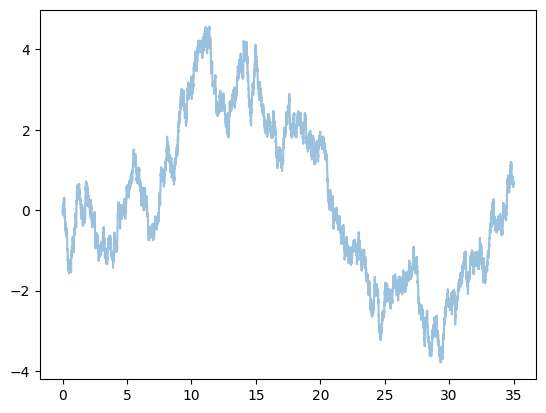

In [6]:
# plt.scatter(np.take(x_,idx_), v_partitions, c='red')
plt.plot(x_,v_brownian_motion, alpha=0.45)
plt.show()

In [7]:
fig = px.line(df_result, x='nb partitions',y='q-variation', title='Quadratic Variation for deterministic function')
fig.show()

In [8]:
fig = px.line(df_result_random, x='nb partitions',y='q-variation', title='Quadratic Variation for Brownian Motion')
fig.show()